In [44]:
import keras

In [45]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import cv2
from scipy import ndimage

from functions import read_png_files, adjust_images, scale_images, plot

In [46]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = images = adjust_images(train_images)
test_images = adjust_images(test_images)


In [47]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [48]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

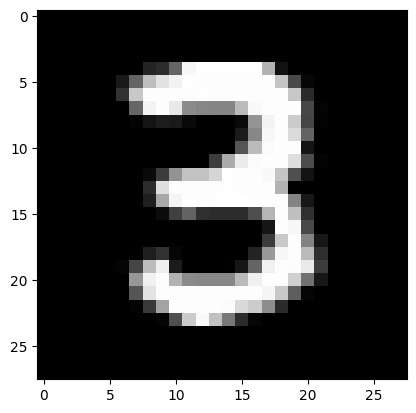

In [49]:
plt.imshow(train_images[7], cmap='grey')
train_labels[7]

In [50]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input images
model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (for each digit) and softmax activation


In [51]:
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd' or 'rmsprop'
              loss='categorical_crossentropy',  # For multi-class classification problems
              metrics=['accuracy'])


In [52]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 [==============================] - 4s 4ms/step - loss: 0.3028 - accuracy: 0.9174 - val_loss: 0.1490 - val_accuracy: 0.9558
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1295 - accuracy: 0.9626 - val_loss: 0.0982 - val_accuracy: 0.9697
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0925 - accuracy: 0.9731 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0727 - val_accuracy: 0.9798
Epoch 5/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0607 - accuracy: 0.9818 - val_loss: 0.0676 - val_accuracy: 0.9802
Epoch 6/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0498 - accuracy: 0.9853 - val_loss: 0.0648 - val_accuracy: 0.9817
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0665 - val_accuracy: 0.9797
Epoch 

In [53]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9808
Test Accuracy: 98.08%


In [54]:
img = np.expand_dims(test_images[7], axis=0)
print(model.predict(img))
test_labels[7]

1/1 [==============================] - 0s 90ms/step
[[5.1578951e-07 2.4992398e-03 3.0612777e-09 1.6466509e-04 6.6998638e-03
  9.3285034e-06 1.3237823e-10 1.1545466e-04 1.2136693e-05 9.9049872e-01]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [55]:
path = r'/home/frepa/Src/mnist/digits'
images = read_png_files(path)

In [56]:
images = adjust_images(images)

In [57]:
images = scale_images(images)

1/1 [==============================] - 0s 67ms/step
6


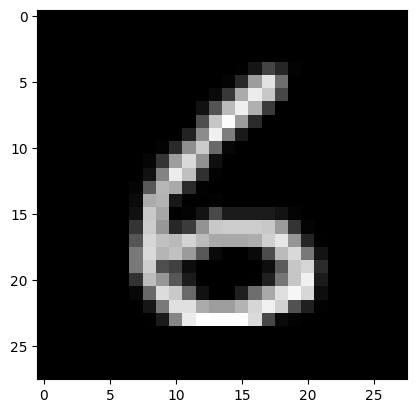

In [69]:
omg = images[9]
img = np.expand_dims(omg, axis=0)
print(np.argmax(model.predict(img)))
plot(omg)

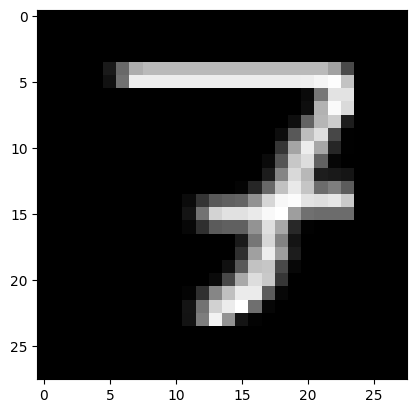

In [59]:
plot(images[6])